In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from utils import PkdbModel, measurement_type_data, filter_out, convert_unit, unstring
#plt.style.use('seaborn-white')
import numpy as np
plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })

import pint
ureg = pint.UnitRegistry()


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
all_complete = PkdbModel("all_complete", destination="2-merged")
all_complete.read()

In [4]:
all_complete.data["CYP"] = all_complete.data[('cyp2d6 phenotype', 'choice')]
all_complete.data["CYP_G"] = all_complete.data[('cyp2d6 genotype', 'choice')]


In [5]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance"] == "morphine")
substance_intervention_index = (all_complete.data["substance_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)
my_data["pharmacokinetics"] = my_data["pharmacokinetics"].apply(eval).apply(lambda x: [e.get("pk") for e in x])

/home/janekg/Env/pkdb_analysis/local/lib/python3.6/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/janekg/Env/pkdb_analysis/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
colors = sns.color_palette("colorblind",n_colors=8)
#header_color = sns.color_palette("dark",n_colors=1)[0]
blues = sns.color_palette("Blues")
my_data["color"] = colors[:3]

/home/janekg/Env/pkdb_analysis/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
frames = []
for i, df in my_data[["time","mean","sd","se","cv","CYP_G","unit","pk","color", "measurement_type","tissue"]].iterrows():

    #print(df["weight"])
    new_df = pd.concat([df]*len(df["time"]), axis=1).T.reset_index()
    new_df["time"] = df["time"]
    new_df["mean"] = df["mean"]
    new_df["sd"] = df["sd"]
    new_df["se"] = df["se"]
    new_df["cv"] = df["cv"]
    
    frames.append(new_df)
df_all = pd.concat(frames)
df_all = convert_unit(df_all, "gram / liter", unit_out = "ng/µl", factor=ureg("gram / liter").to("ng/µl").m , data_fields=["mean","sd","se"])

In [8]:
df_all

,index,time,mean,sd,se,cv,CYP_G,unit,pk,color,measurement_type,tissue
0,3129,0.00,0.000000,NaN,NaN,NaN,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
1,3129,0.25,0.000284,0.000333,0.000111,1.170,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
2,3129,0.50,0.000556,0.000484,0.000161,0.872,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
3,3129,1.00,0.000588,0.000410,0.000137,0.698,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
4,3129,2.00,0.000427,0.000278,0.000093,0.651,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
5,3129,3.00,0.000269,0.000145,0.000048,0.540,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
6,3129,4.00,0.000188,0.000110,0.000037,0.583,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
7,3129,6.00,0.000108,0.000120,0.000040,1.100,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
8,3129,8.00,0.000070,0.000116,0.000039,1.660,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma
9,3129,10.00,0.000061,0.000084,0.000028,1.380,*10/*10,ng/µl,1670,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration,plasma


In [9]:
ureg("gram / liter").to("ng/µl").m

999.9999999999999

In [10]:
from scipy import stats
def _regression(t, c):
    """ Linear regression on the log timecourse after maximal value.
    No check is performed if already in equilibrium distribution !.
    The linear regression is calculated from all data points after the maximum.

    :return:
    """
    # TODO: check for distribution and elimination part of curve.
    max_index = np.argmax(c)
    
    # linear regression
    x = t[-4:]
    y = np.log(c[-4:])
    if max_index == (len(c) - 1):
        return [np.nan] * 6
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return [slope, intercept, r_value, p_value, std_err, max_index]


,Unnamed: 0,study,output_type,pk,access,tissue,interventions,raw_pk,measurement_type,substance,...,"(consumption, sd)","(consumption, substance)","(consumption, unit)","(abstinence smoking, count)","(abstinence smoking, min)","(abstinence smoking, unit)",inferred,CYP,CYP_G,color
3129,3129,Wu2014,timecourses,1670,public,plasma,876,1658,concentration,morphine,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,*10/*10,"(0.00392156862745098, 0.45098039215686275, 0.6..."
3190,3190,Wu2014,timecourses,1668,public,plasma,876,1656,concentration,morphine,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,*1/*1,"(0.8705882352941177, 0.5607843137254902, 0.019..."
3251,3251,Wu2014,timecourses,1669,public,plasma,876,1657,concentration,morphine,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,*1/*10,"(0.00784313725490196, 0.6196078431372549, 0.45..."


In [11]:
#[slope, intercept, r_value, p_value, std_err, max_index] = _regression(x,y)

#plt.plot(x,y)
#plt.plot(x[3:],np.exp(intercept + slope * x[3:]), "--")
#plt.yscale("log")


In [12]:
#my_func()

In [13]:
#x = df_CYP["time"][3:]
#y = np.log(df_CYP["mean"][3:])
#[slope, intercept, r_value, p_value, std_err] = stats.linregress(x, y)
#[slope, intercept, r_value, p_value, std_err]

In [14]:
#plt.plot(x,y)
#plt.plot(x,intercept+slope*x)

In [15]:
#df_CYP["mean"][3]

In [16]:
# [np.exp(slope), np.exp(intercept), r_value, p_value, std_err, max_index]

In [17]:
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


/home/janekg/Env/pkdb_analysis/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


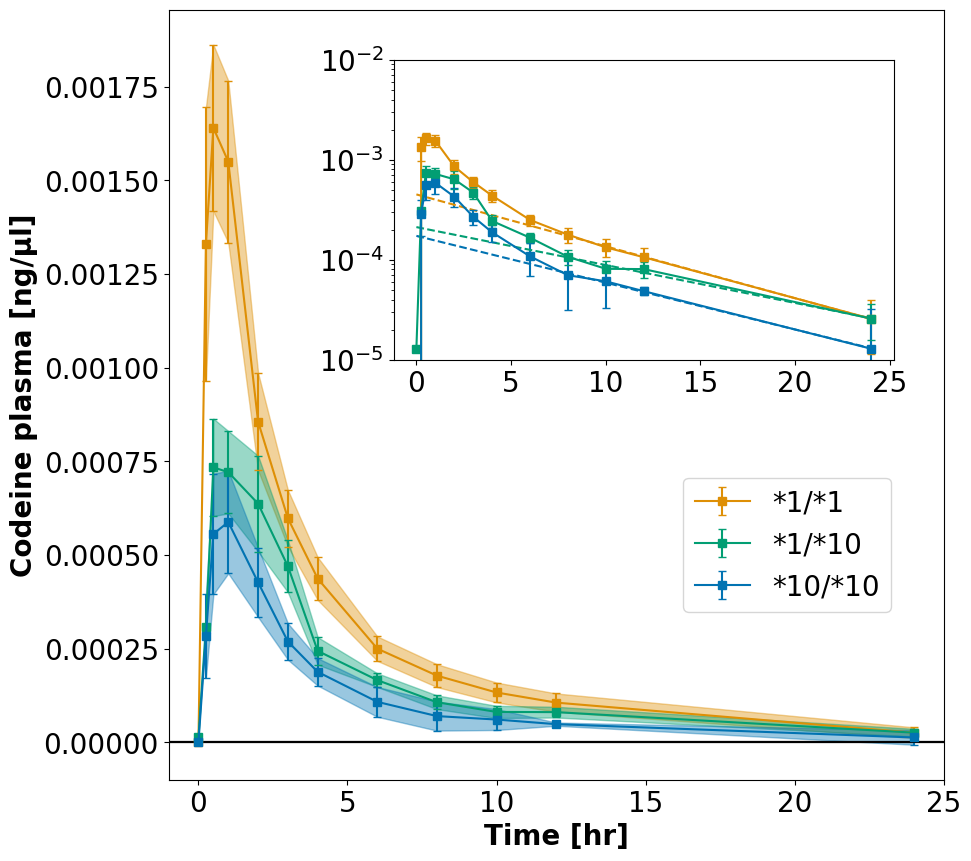

In [18]:
with plt.style.context("default"):
    plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    left, bottom, width, height = [0.35, 0.53, 0.5, 0.3]
    ax2 = fig.add_axes([left, bottom, width, height])
    axes = (ax1, ax2)
    #ax2.xaxis.set_visible(False)
    #ax2.yaxis.set_visible(False)                  
    ax2.set_yscale("log")
    ax2.set_ylim(bottom=0.00001, top=0.01)                 
    ax1.set_xlim(left=-1, right=25)                 


    for CYP_G, df_CYP in df_all.groupby("CYP_G"):

        #label = CYP_G
        #for i, output in output_pks.iterrows():
        #    label += f"\n {output['pktype']:>10}: {output['mean']:<15} {'['+output['unit']+']':>10}"

        #print(label)
        if CYP_G == "*1/*1":
            x = df_CYP["time"]
            y = df_CYP["mean"]
        for ax in axes:
            ax.errorbar(df_CYP["time"], df_CYP["mean"],label=CYP_G,color=df_CYP['color'].unique()[0],yerr=df_CYP["se"],fmt="-s", capsize=3)#, label=label)#,yerr=df_CYP["sd"])


        [slope, intercept, r_value, p_value, std_err, max_index] = _regression(df_CYP["time"],df_CYP["mean"])
        ax2.plot(df_CYP["time"],np.exp(intercept) * np.exp(slope * df_CYP["time"]), "--", color=df_CYP['color'].unique()[0])#, label="fit")

        ax1.hlines(0,-2,26)
        ax1.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray",color = df_CYP['color'].unique()[0])







    ax1.set_xlabel("Time [hr]")
    ax1.set_ylabel(f"Codeine {df_CYP['tissue'].unique()[0]} [{df_CYP['unit'].unique()[0]}]")

    """

    """
    ax1.legend(loc="lower right",bbox_to_anchor=(0.95, 0.2))
    plt.savefig("codeine.png", dpi=300,bbox_inches="tight")

    plt.show()

    #plt.savefig("codeine.tif", dpi=300,bbox_inches="tight")





In [19]:
diff_rel = "$\\frac{o - t}{o}$"
diff = "o-t"
original_pk = "$Pk_{original}$"
timecourse_pk = "$Pk_{timecourse}$"

In [24]:
outputs_n = outputs.reset_index().pivot_table(columns="calculated",index=["measurement_type","CYP_G","unit"],values = ["mean","sd"])


NameError: name 'outputs' is not defined

In [ ]:
outputs_n[("mean", True)] = outputs_n[("mean", True)].round(2)

outputs_n[diff] = (outputs_n[("mean", False)] - outputs_n[("mean", True)]).round(2)
outputs_n[diff_rel] = (100*((outputs_n[("mean", False)] - outputs_n[("mean", True)]) / outputs_n[("mean", False)])).round(2)

mean_ind = ('mean', False)
sd_ind = ('sd', False)

def output_string(x):
    if x[mean_ind] > 0:
        return f"${x[mean_ind]:.2f} \pm {x[sd_ind]:.2f}$"
    else:
        return ""
    

outputs_n[original_pk] = outputs_n.apply(output_string, axis=1)
outputs_n[timecourse_pk] = outputs_n[('mean', True)]
                                          

In [ ]:
#outputs_n.columns = outputs_n.columns.droplevel(1)


In [ ]:
#outputs_n[[original_pk,timecourse_pk,diff,diff_rel]]
#outputs_n[[original_pk,timecourse_pk,diff,diff_rel]].to_csv("codeine.csv")

In [ ]:
#outputs_n.replace(np.nan, '', regex=True)


In [ ]:
outputs_n = outputs_n.reset_index()[["measurement_type","CYP_G","unit",original_pk,timecourse_pk,diff,diff_rel]]
outputs_n = outputs_n.rename(columns={"CYP_G":"${CYP}_{G}$","measurement_type":"Measurement Type","unit":"Unit"})
outputs_n = outputs_n.replace({"Measurement Type": {
    "auc_end": "$AUC_{end}$",
    "auc_inf": "$AUC_{\infty}$",
    "clearance": "$Clearance$",
    "cmax": "$C_{max}$",
    "kel": "$k_{el}$",
    "thalf": "$t_{half}$",
    "tmax": "$t_{max}$",
    "vd": "$Vd$",



}})
outputs_n = outputs_n.replace({"${CYP}_{G}$": {
    "*1/*1": "${^*}1/ {^*}1$",
    "*1/*10": "${^*}1/ {^*}10$",
    "*10/*10": "${^*}10/ {^*}10$",
}})

In [ ]:
result = outputs_n[~(outputs_n.sort_index(na_position='last')["Measurement Type"] == "$k_{el}$")]
result =result.append(outputs_n[(outputs_n.sort_index(na_position='last')["Measurement Type"] == "$k_{el}$")]) 
#result.reset_index(["m"])

In [ ]:
result = result.set_index(["Measurement Type","Unit","${CYP}_{G}$"])

In [ ]:
result = result.replace(np.nan, '', regex=True)

In [ ]:
result.columns = result.columns.droplevel(1)
result.to_csv("codeine.csv")

In [ ]:
result